# Voting (회귀) 기본코드

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.regression import *

# 보팅 회귀
from sklearn.ensemble import VotingRegressor

# 회귀모형 클래스
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX

## #02. 데이터 전처리

### [1] 훈련/검증 데이터 분할 및 데이터 표준화

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, 'MEDV', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## #03. 기본 Voting

### [1] Voting에 참여시킬 개별 알고리즘 객체 생성

In [4]:
lrg = LinearRegression()
rgr = Ridge()
lsr = Lasso()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
sgdr = SGDRegressor()

### [2] 개별 모델을 앙상블 모델로 결합

In [5]:
vo = VotingRegressor(
    # 결합할 알고리즘의 리스트 (이름, 알고리즘객체) - 이름은 개발자가 마음대로 지정
    estimators=[('lrg', lrg), ('rgr', rgr), ('lsr', lsr), ('knr', knr), ('dtr', dtr), ('svr', svr), ('sgdr', sgdr)],
    n_jobs=-1)

# 학습
vo.fit(X=x_train, y=y_train)

# 예측(검증데이터로...)
y_pred = vo.predict(X=x_test)

### [3] 성능평가

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.838226 |     0.780471 |
| 평균절대오차(MAE)             |      2.40562 |      2.91382 |
| 평균제곱오차(MSE)             |      13.6146 |      18.7292 |
| 평균오차(RMSE)                |      3.68979 |      4.32772 |
| 평균 절대 백분오차 비율(MAPE) |      11.3319 |      15.9043 |
| 평균 비율 오차(MPE)           |     -2.52318 |     -5.78972 |
+-------------------------------+--------------+--------------+

[학습곡선]


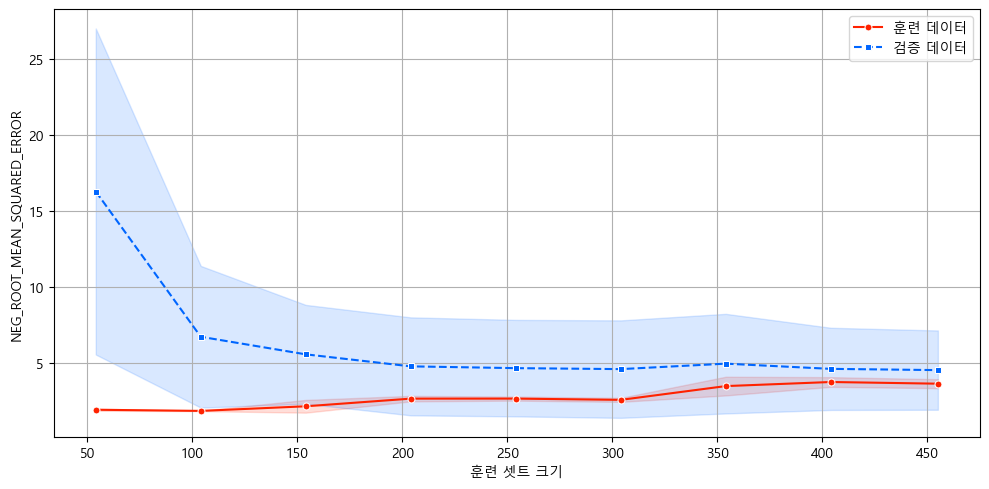

In [6]:
my_regression_result(estimator=vo, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)


### [4] 독립변수 보고

In [7]:
my_regression_report(estimator=vo, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 3.31189 |
|  1 | MEDV       | ZN         | 3.19958 |
|  2 | MEDV       | INDUS      | 4.74148 |
|  3 | MEDV       | CHAS       | 1.13018 |
|  4 | MEDV       | NOX        | 6.11484 |
|  5 | MEDV       | RM         | 2.04028 |
|  6 | MEDV       | AGE        | 3.15955 |
|  7 | MEDV       | DIS        | 4.92998 |
|  8 | MEDV       | RAD        | 10.6946 |
|  9 | MEDV       | TAX        | 12.7292 |
| 10 | MEDV       | PTRATIO    | 2.37277 |
| 11 | MEDV       | B          | 1.39447 |
| 12 | MEDV       | LSTAT      | 4.52044 |
+----+------------+------------+---------+

